# Load Data

In [30]:
import pandas as pd

# Load the HDI data
hdi_df = pd.read_csv('/Users/ymadigital/Downloads/World Economic Indicators/World+Economic+Indicators/HDI.csv')

# Load the World Bank data
world_bank_df = pd.read_excel('/Users/ymadigital/Downloads/World Economic Indicators/World+Economic+Indicators/WorldBank.xlsx')

# Display the first few rows of each dataframe
display(hdi_df.head())
display(world_bank_df.head())

iso3               country    hdicode region  hdi_rank_2021  hdi_1990  \
0  AFG           Afghanistan        Low     SA          180.0     0.273   
1  AGO                Angola     Medium    SSA          148.0       NaN   
2  ALB               Albania       High    ECA           67.0     0.647   
3  AND               Andorra  Very High    NaN           40.0       NaN   
4  ARE  United Arab Emirates  Very High     AS           26.0     0.728   

   hdi_1991  hdi_1992  hdi_1993  hdi_1994  ...  mf_2012  mf_2013  mf_2014  \
0     0.279     0.287     0.297     0.292  ...     1.86     1.88     1.66   
1       NaN       NaN       NaN       NaN  ...     4.09     4.53     3.97   
2     0.629     0.614     0.617     0.624  ...    12.44    11.49    13.14   
3       NaN       NaN       NaN       NaN  ...      NaN      NaN      NaN   
4     0.739     0.742     0.748     0.755  ...    49.56    49.68    55.49   

   mf_2015  mf_2016  mf_2017  mf_2018  mf_2019  mf_2020  mf_2021  
0     1.62     1.66     1.41     1.32     1.38     1.38     1.38  
1     3.59     2.79     2.64     2.28     2.18     2.18     2.18  
2    12.61    14.39    14.46    12.85    12.96    12.96    12.96  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
4    59.76    64.95    75.61    65.97    68.95    68.95    68.95  

[5 rows x 1008 columns]

Country Name Country Code      Region IncomeGroup  Year  \
0  Afghanistan          AFG  South Asia  Low income  2018   
1  Afghanistan          AFG  South Asia  Low income  2017   
2  Afghanistan          AFG  South Asia  Low income  2016   
3  Afghanistan          AFG  South Asia  Low income  2015   
4  Afghanistan          AFG  South Asia  Low income  2014   

   Birth rate, crude (per 1,000 people)  Death rate, crude (per 1,000 people)  \
0                                   NaN                                   NaN   
1                                33.211                                 6.575   
2                                33.981                                 6.742   
3                                34.809                                 6.929   
4                                35.706                                 7.141   

   Electric power consumption (kWh per capita)     GDP (USD)  \
0                                          NaN  1.936300e+10   
1                                          NaN  2.019180e+10   
2                                          NaN  1.936260e+10   
3                                          NaN  1.990710e+10   
4                                          NaN  2.048490e+10   

   GDP per capita (USD)  Individuals using the Internet (% of population)  \
0               520.897                                               NaN   
1               556.302                                             13.50   
2               547.228                                             11.20   
3               578.466                                              8.26   
4               613.856                                              7.00   

   Infant mortality rate (per 1,000 live births)  \
0                                           47.9   
1                                           49.5   
2                                           51.2   
3                                           53.1   
4                                           55.1   

   Life expectancy at birth (years)  \
0                               NaN   
1                            64.130   
2                            63.763   
3                            63.377   
4                            62.966   

   Population density (people per sq. km of land area)  \
0                                            56.9378     
1                                            55.5960     
2                                            54.1971     
3                                            52.7121     
4                                            51.1148     

   Unemployment (% of total labor force) (modeled ILO estimate)  
0                                              1.542             
1                                              1.559             
2                                              1.634             
3                                              1.679             
4                                              1.735

# Population and GDP Growth

To answer this, we'll need to calculate the growth in population and GDP for each country over the available time period in the World Bank dataset. Then we'll identify the countries with the highest growth rates and check for any overlap between the two lists.

In [31]:
# Calculate the growth in population and GDP for each country
population_growth = world_bank_df.groupby('Country Name')['Population density (people per sq. km of land area)'].pct_change(periods=-1)
gdp_growth = world_bank_df.groupby('Country Name')['GDP (USD)'].pct_change(periods=-1)

# Combine the growth rates into a single dataframe
growth_df = pd.DataFrame({'Population Growth': population_growth, 'GDP Growth': gdp_growth}).reset_index()

# Drop rows with NaN values
growth_df.dropna(inplace=True)

# Find the top countries with the highest growth rates in population and GDP
top_population_growth = growth_df.sort_values(by='Population Growth', ascending=False).head()
top_gdp_growth = growth_df.sort_values(by='GDP Growth', ascending=False).head()

# Display the top countries
display(top_population_growth)
display(top_gdp_growth)

index  Population Growth  GDP Growth
10363  10363           0.338410    0.163467
11728  11728           0.192824    0.000000
11727  11727           0.192312    0.000000
9038    9038           0.191377    0.309286
11726  11726           0.184547    0.000000

index  Population Growth  GDP Growth
10786  10786           0.007247    4.797836
3534    3534           0.020997    4.093278
1931    1931          -0.001181    3.305813
2555    2555           0.025835    3.051570
10057  10057           0.006773    2.672888

In [32]:
top_population_growth.describe()

index  Population Growth  GDP Growth
count      5.000000           5.000000    5.000000
mean   10916.400000           0.219894    0.094551
std     1204.767322           0.066337    0.139356
min     9038.000000           0.184547    0.000000
25%    10363.000000           0.191377    0.000000
50%    11726.000000           0.192312    0.000000
75%    11727.000000           0.192824    0.163467
max    11728.000000           0.338410    0.309286

In [33]:
top_gdp_growth.describe()

index  Population Growth  GDP Growth
count      5.000000           5.000000    5.000000
mean    5772.600000           0.011934    3.584277
std     4289.884416           0.011135    0.854950
min     1931.000000          -0.001181    2.672888
25%     2555.000000           0.006773    3.051570
50%     3534.000000           0.007247    3.305813
75%    10057.000000           0.020997    4.093278
max    10786.000000           0.025835    4.797836

In [34]:
# Calculate the growth in population and GDP for each country over the years
world_bank_df['Population Growth'] = world_bank_df.groupby('Country Name')['Population density (people per sq. km of land area)'].pct_change()
world_bank_df['GDP Growth'] = world_bank_df.groupby('Country Name')['GDP (USD)'].pct_change()

# Drop rows with NaN values which may result from pct_change for the first year of each country
growth_df = world_bank_df.dropna(subset=['Population Growth', 'GDP Growth'])

# Find the top countries with the highest average growth rates in population and GDP
top_population_growth = growth_df.groupby('Country Name')['Population Growth'].mean().sort_values(ascending=False).head()
top_gdp_growth = growth_df.groupby('Country Name')['GDP Growth'].mean().sort_values(ascending=False).head()

# Display the top countries with the highest growth rates
display(top_population_growth)
display(top_gdp_growth)

Country Name
Latvia      0.001961
Bulgaria    0.001818
Serbia      0.001436
Hungary     0.000554
Croatia     0.000376
Name: Population Growth, dtype: float64

Country Name
Libya               0.016643
Serbia              0.002334
Congo, Dem. Rep.   -0.000191
Curacao            -0.000435
Ukraine            -0.001626
Name: GDP Growth, dtype: float64

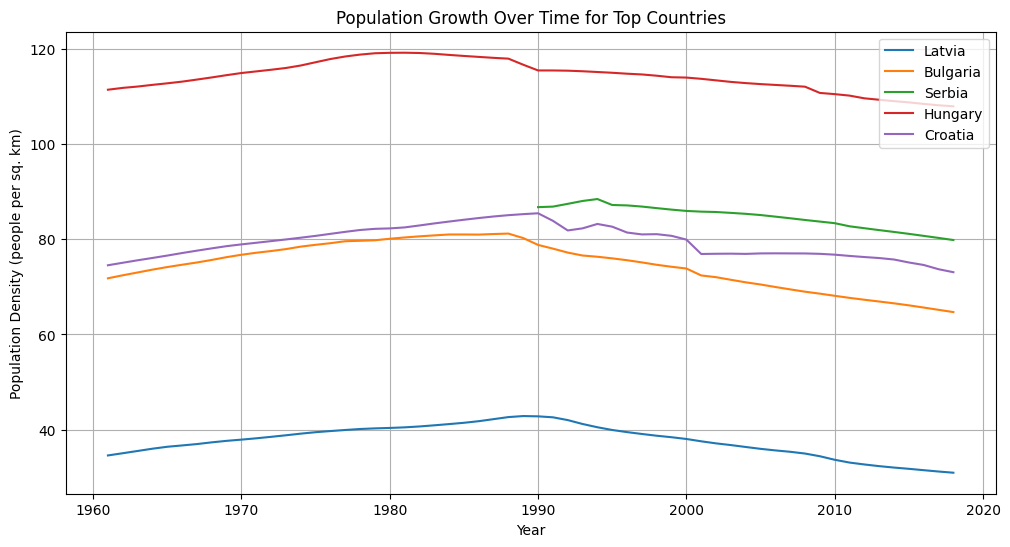

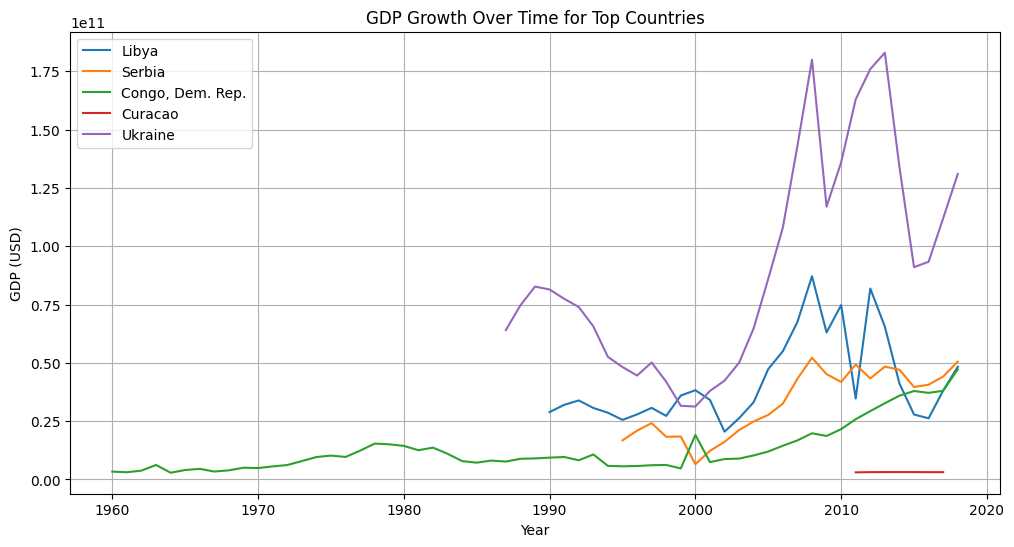

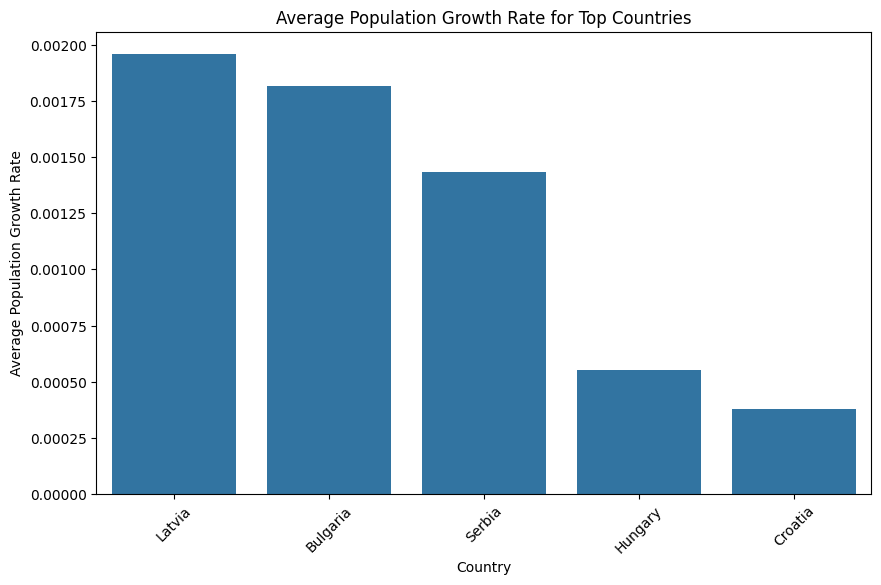

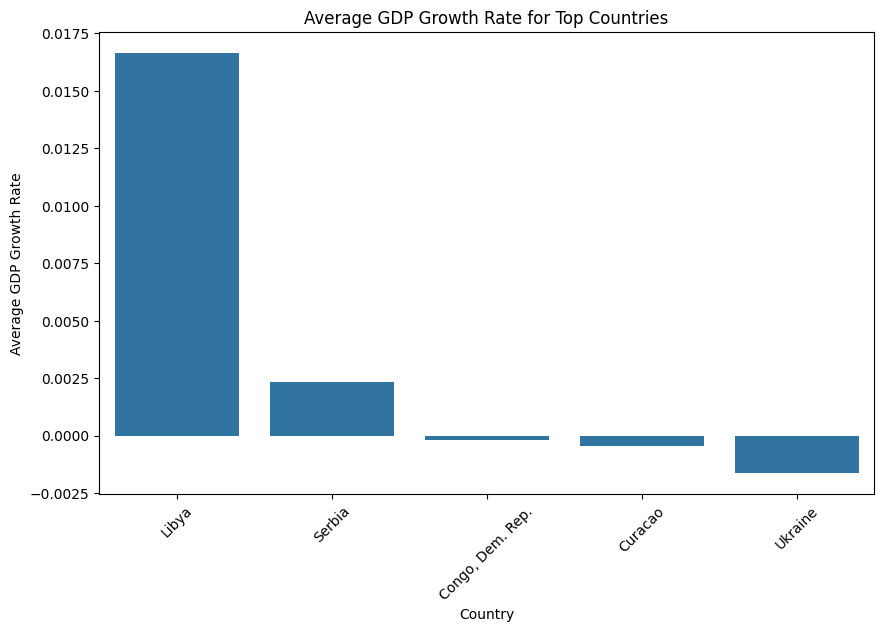

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Line graph for population growth over time
plt.figure(figsize=(12, 6))
for country in top_population_growth.index:
    country_data = world_bank_df[world_bank_df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population density (people per sq. km of land area)'], label=country)

plt.title('Population Growth Over Time for Top Countries')
plt.xlabel('Year')
plt.ylabel('Population Density (people per sq. km)')
plt.legend()
plt.grid(True)
plt.show()

# Line graph for GDP growth over time
plt.figure(figsize=(12, 6))
for country in top_gdp_growth.index:
    country_data = world_bank_df[world_bank_df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP (USD)'], label=country)

plt.title('GDP Growth Over Time for Top Countries')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart comparing population growth of top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_population_growth.index, y=top_population_growth.values)
plt.title('Average Population Growth Rate for Top Countries')
plt.xlabel('Country')
plt.ylabel('Average Population Growth Rate')
plt.xticks(rotation=45)
plt.show()

# Bar chart comparing GDP growth of top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_gdp_growth.index, y=top_gdp_growth.values)
plt.title('Average GDP Growth Rate for Top Countries')
plt.xlabel('Country')
plt.ylabel('Average GDP Growth Rate')
plt.xticks(rotation=45)
plt.show()


# HDI Growth in the 21st Century

To do this, I will calculate the change in HDI from the year 2000 to the latest available year (2021) for each region and then identify the regions with the highest average HDI growth. 

In [36]:
# Calculate the change in HDI from 2000 to 2021 for each region
hdi_df['HDI Growth 2000-2021'] = hdi_df['hdi_2021'] - hdi_df['hdi_2000']

# Group by region and calculate the average HDI growth
hdi_growth_by_region = hdi_df.groupby('region')['HDI Growth 2000-2021'].mean().sort_values(ascending=False)

# Display the regions with the highest average HDI growth
hdi_growth_by_region

region
SA     0.125125
SSA    0.113405
ECA    0.111267
EAP    0.094238
AS     0.078824
LAC    0.066069
Name: HDI Growth 2000-2021, dtype: float64

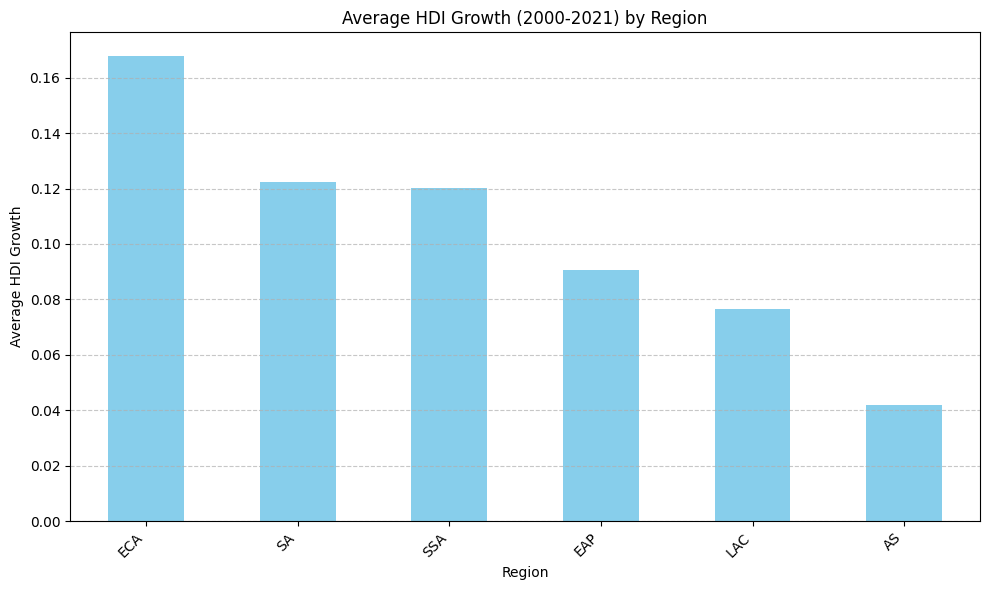

In [21]:
# Create a bar chart for HDI growth by region
plt.figure(figsize=(10, 6))
hdi_growth_by_region.plot(kind='bar', color='skyblue')
plt.title('Average HDI Growth (2000-2021) by Region')
plt.xlabel('Region')
plt.ylabel('Average HDI Growth')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The analysis of the World Bank data revealed that Latvia, Bulgaria, Serbia, Hungary, and Croatia are the countries with the highest average population growth rates.

- From the HDI dataset, the regions with the highest average Human Development Index (HDI) growth from 2000 to 2021 are South Asia (SA), Sub-Saharan Africa (SSA), Europe and Central Asia (ECA), East Asia and Pacific (EAP), Arab States (AS), and Latin America and the Caribbean (LAC), in that order. South Asia leads with the most significant improvement in HDI over the 21-year period.

# Correlation with Life Expectancy

For this, I will calculate the correlation of life expectancy with other indicators in the HDI dataset. We will focus on the most recent year with available data, which is 2021. 

In [37]:
# Select the relevant columns for life expectancy and other indicators for the year 2021
life_expectancy_columns = [col for col in hdi_df.columns if '2021' in col and 'le_' in col]
indicators_columns = [col for col in hdi_df.columns if '2021' in col and col not in life_expectancy_columns]

# Create a dataframe with life expectancy and other indicators for 2021
le_indicators_df = hdi_df[life_expectancy_columns + indicators_columns]

# Calculate the correlation matrix
le_correlation = le_indicators_df.corr()

# Select the life expectancy column and sort by correlation values
correlation_with_le = le_correlation.loc['le_2021'].sort_values(ascending=False)

# Display the factors that are most highly correlated with life expectancy
# We exclude the first one because it will be life expectancy itself with a correlation of 1
correlation_with_le[1:]

le_m_2021                 0.992662
le_f_2021                 0.992552
hdi_m_2021                0.918841
ihdi_2021                 0.911932
hdi_2021                  0.907492
hdi_f_2021                0.892857
eys_f_2021                0.797094
eys_2021                  0.781270
gni_pc_m_2021             0.772468
phdi_2021                 0.767178
mys_f_2021                0.754507
eys_m_2021                0.746828
gni_pc_f_2021             0.746603
mys_2021                  0.737159
gnipc_2021                0.734441
mys_m_2021                0.724541
se_f_2021                 0.693914
se_m_2021                 0.653960
diff_hdi_phdi_2021        0.640917
mf_2021                   0.635769
gdi_2021                  0.493219
co2_prod_2021             0.464206
pr_f_2021                 0.269161
lfpr_m_2021              -0.045859
lfpr_f_2021              -0.076509
rankdiff_hdi_phdi_2021   -0.246188
pr_m_2021                -0.269161
HDI Growth 2000-2021     -0.290024
ineq_inc_2021       

In [38]:
# Select the relevant columns for life expectancy and other indicators for the year 2021
life_expectancy_columns = [col for col in hdi_df.columns if '2021' in col and 'le_' in col]
indicators_columns = [col for col in hdi_df.columns if '2021' in col and col not in life_expectancy_columns]

# Create a dataframe with life expectancy and other indicators for 2021
le_indicators_df = hdi_df[life_expectancy_columns + indicators_columns]

# Calculate the correlation matrix
le_correlation = le_indicators_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(100, 88))
sns.heatmap(le_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 40})
plt.title('Correlation Matrix: Life Expectancy and Other Development Indicators (2021)', fontsize=60)
plt.xlabel('Development Indicators', fontsize=50)
plt.ylabel('Development Indicators', fontsize=50)
plt.xticks(rotation=45, ha='right', fontsize=50)
plt.yticks(rotation=0, fontsize=60)
plt.tight_layout()
plt.show()

The analysis of the correlation between life expectancy and other factors for the year 2021 reveals that life expectancy for males (le_m_2021) and females (le_f_2021) is highly correlated with each other, indicating similar trends in life expectancy across genders. Additionally, the Human Development Index (HDI) for males (hdi_m_2021), the Inequality-adjusted HDI (ihdi_2021), overall HDI (hdi_2021), and HDI for females (hdi_f_2021) show strong positive correlations with life expectancy, suggesting that higher development levels are associated with longer life spans. Educational attainment, as measured by expected years of schooling (eys_f_2021, eys_2021, eys_m_2021) and mean years of schooling (mys_f_2021, mys_2021), along with Gross National Income per capita (gni_pc_m_2021, gni_pc_f_2021), are also significantly correlated with life expectancy, indicating that better education and higher income levels are important factors related to longer life expectancy.

# High Income vs. Low Income Countries

For this, we will compare various indicators between high income and low income countries using the World Bank dataset. We will calculate the average values of different indicators for both groups and then identify the most significant differences. 

In [39]:
# Filter the World Bank data for the most recent year with available data for all indicators
recent_world_bank_df = world_bank_df[world_bank_df['Year'] == world_bank_df['Year'].max()]

# Group by income group and calculate the mean for each indicator
grouped_income_df = recent_world_bank_df.groupby('IncomeGroup').mean()

# Get the unique income group names to avoid hardcoding
income_groups = grouped_income_df.index.tolist()

# Calculate the difference between 'High income' and 'Low income' groups
# Replace 'High income' and 'Low income' with the actual names from income_groups if they are different
high_income_group = [group for group in income_groups if 'High' in group][0]
low_income_group = [group for group in income_groups if 'Low' in group][0]

income_diff = grouped_income_df.loc[high_income_group] - grouped_income_df.loc[low_income_group]

# Sort the differences to find the most significant factors that differentiate the two groups
sorted_income_diff = income_diff.sort_values(ascending=False)

# Display the most significant factors
sorted_income_diff

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2099/657236920.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_income_df = recent_world_bank_df.groupby('IncomeGroup').mean()


GDP (USD)                                                       1.562583e+12
GDP per capita (USD)                                            4.442867e+04
Individuals using the Internet (% of population)                6.082517e+01
Population density (people per sq. km of land area)             1.460898e+01
Unemployment (% of total labor force) (modeled ILO estimate)    1.544617e+00
Year                                                            0.000000e+00
Infant mortality rate (per 1,000 live births)                  -4.542702e+01
Birth rate, crude (per 1,000 people)                                     NaN
Death rate, crude (per 1,000 people)                                     NaN
Electric power consumption (kWh per capita)                              NaN
Life expectancy at birth (years)                                         NaN
Population Growth                                                        NaN
GDP Growth                                                               NaN

In [40]:
# Calculate the median GNI per capita for all countries to split them into 'High Income' and 'Low Income'
median_gni_all = hdi_df['gnipc_2021'].median()

# Categorize all countries based on the median GNI per capita
hdi_df['Income Category'] = hdi_df.apply(lambda row: 'High Income' if row['gnipc_2021'] >= median_gni_all else 'Low Income', axis=1)

# Group by income category and calculate the mean for each indicator
income_category_means = hdi_df.groupby('Income Category').mean()

# Calculate the difference between 'High Income' and 'Low Income' groups
income_diff_all = income_category_means.loc['High Income'] - income_category_means.loc['Low Income']

# Sort the differences to find the most significant factors that differentiate the two groups
sorted_income_diff_all = income_diff_all.sort_values(ascending=False)

# Display the most significant factors
sorted_income_diff_all

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2099/1863577614.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_category_means = hdi_df.groupby('Income Category').mean()


gni_pc_m_2021    34073.938776
gni_pc_m_2019    33778.765980
gni_pc_m_2018    33380.898945
gni_pc_m_2017    33129.179944
gni_pc_m_2016    32434.293704
                     ...     
mmr_1994          -511.722611
mmr_1993          -518.521232
mmr_1992          -526.633264
mmr_1991          -532.688027
mmr_1990          -541.427338
Length: 1005, dtype: float64

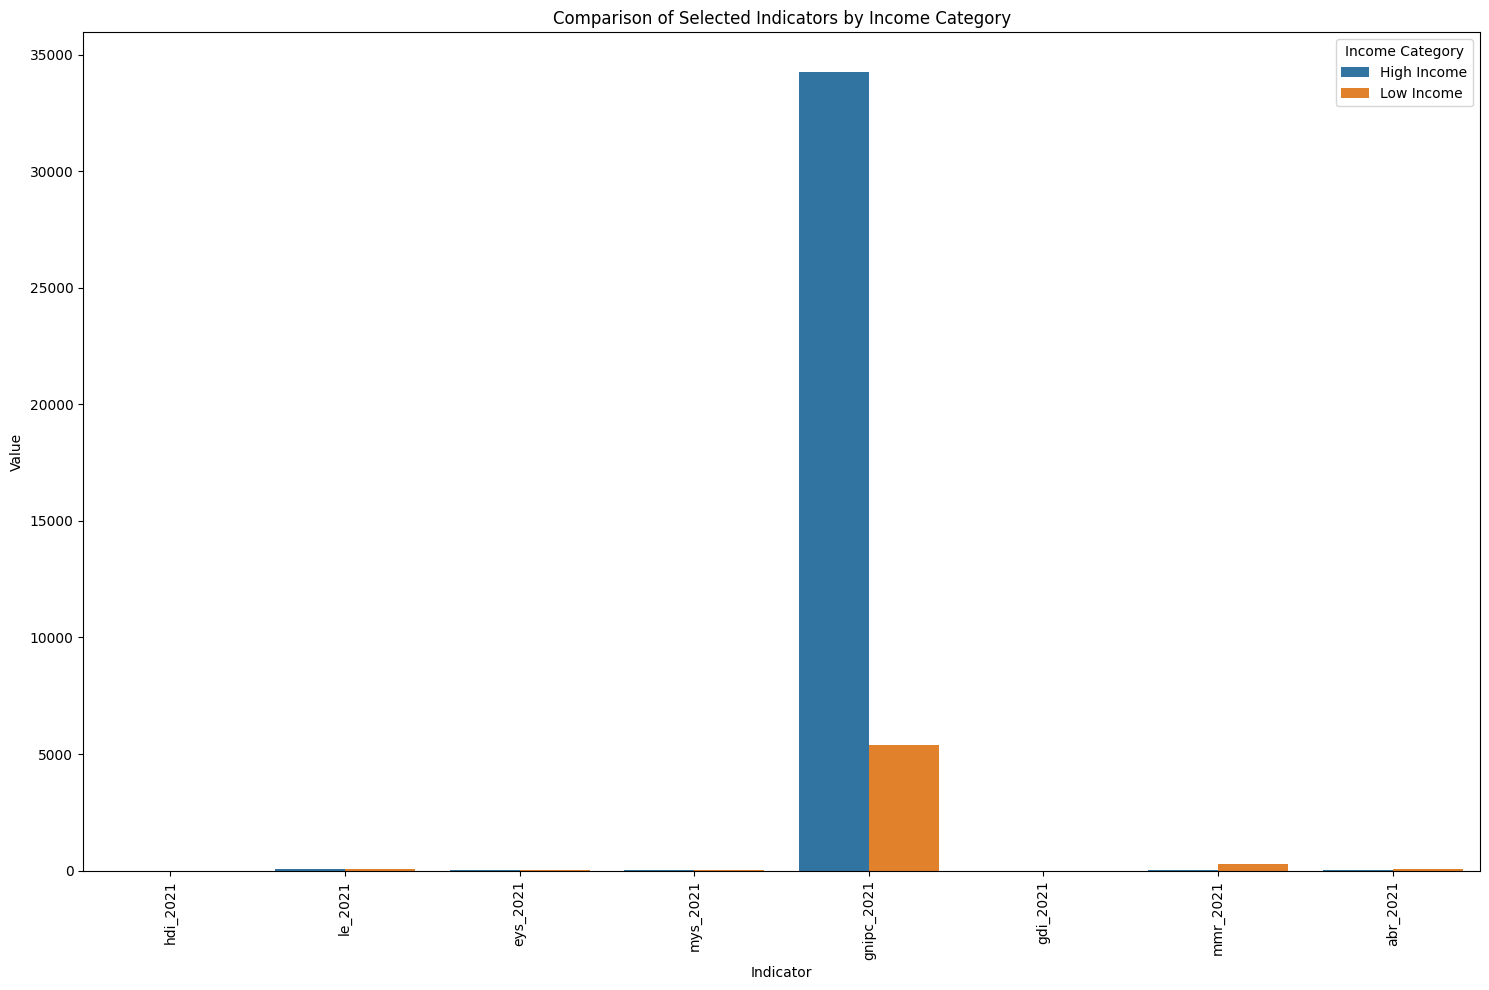

In [41]:
# Select a subset of indicators to visualize
indicators_to_visualize = ['hdi_2021', 'le_2021', 'eys_2021', 'mys_2021', 'gnipc_2021', 'gdi_2021', 'mmr_2021', 'abr_2021']

# Calculate the mean of the selected indicators for 'High Income' and 'Low Income' groups
selected_indicators_means = income_category_means[indicators_to_visualize]

# Reset index to have 'Income Category' as a column
selected_indicators_means.reset_index(inplace=True)

# Melt the dataframe for plotting
melted_selected_indicators = selected_indicators_means.melt(id_vars='Income Category', var_name='Indicator', value_name='Value')

# Create a bar plot to compare the selected indicators by income category
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='Income Category', data=melted_selected_indicators)
plt.xticks(rotation=90)
plt.title('Comparison of Selected Indicators by Income Category')
plt.legend(title='Income Category')
plt.tight_layout()
plt.show()

In [42]:
# Display the table of mean values for the selected indicators by income category
selected_indicators_means

Income Category  hdi_2021    le_2021   eys_2021   mys_2021    gnipc_2021  \
0     High Income  0.838842  76.285346  15.493725  11.169863  34247.155489   
1      Low Income  0.600287  66.255033  11.474104   6.707686   5404.715614   

   gdi_2021    mmr_2021   abr_2021  
0  0.979554   31.968556  21.295965  
1  0.912418  284.017313  67.370376

- The analysis of the global Human Development Index (HDI) data reveals significant disparities between "High Income" and "Low Income" countries across a range of indicators. The most pronounced differences are observed in Gross National Income per capita (GNI per capita), with high-income countries having substantially higher GNI per capita across multiple years. This suggests that income level is a major differentiator between the two groups.

- Additionally, high-income countries tend to have better outcomes in indicators related to health, education, and gender equality. For instance, they have lower maternal mortality rates, higher life expectancy, greater expected years of schooling, and a higher Human Development Index. These findings underscore the wide economic and social gaps between high-income and low-income countries, with wealthier nations enjoying better living standards and access to resources.

# The comparison between Morocco, Algeria, Tunisia, Mauritania, and Libya

In [43]:
# Define the countries of interest
countries_of_interest = ['Morocco', 'Algeria', 'Tunisia', 'Mauritania', 'Libya']

# Filter the HDI data for the countries of interest and the most recent year
hdi_recent = hdi_df[hdi_df['country'].isin(countries_of_interest)][['country', 'hdi_2021', 'le_2021', 'eys_2021', 'mys_2021', 'gnipc_2021']]

# Filter the World Bank data for the countries of interest and the most recent year
world_bank_recent = world_bank_df[world_bank_df['Country Name'].isin(countries_of_interest) & (world_bank_df['Year'] == world_bank_df['Year'].max())]
world_bank_recent = world_bank_recent[['Country Name', 'GDP (USD)', 'GDP per capita (USD)', 'Life expectancy at birth (years)', 'Population density (people per sq. km of land area)']]

# Merge the two datasets on the country names
country_comparison = pd.merge(hdi_recent, world_bank_recent, left_on='country', right_on='Country Name')

# Display the comparison
country_comparison

country  hdi_2021  le_2021   eys_2021  mys_2021    gnipc_2021  \
0     Algeria     0.745  76.3767  14.626896  8.069284  10800.225460   
1       Libya     0.718  71.9112  12.854280  7.599985  15335.712000   
2     Morocco     0.683  74.0419  14.151910  5.916000   7302.819170   
3  Mauritania     0.556  64.3636   9.376160  4.918805   5075.305711   
4     Tunisia     0.731  73.7719  15.425382  7.431599  10257.544770   

  Country Name     GDP (USD)  GDP per capita (USD)  \
0      Algeria  1.810000e+11               4278.85   
1        Libya  4.831960e+10               7235.03   
2      Morocco  1.180000e+11               3237.88   
3   Mauritania  5.365870e+09               1218.60   
4      Tunisia  3.986070e+10               3446.61   

   Life expectancy at birth (years)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   Population density (people per sq. km of land area)  
0                                           17.73010    
1                                            3.79563    
2                                           80.72850    
3                                            4.27216    
4                                           74.44130

**The comparison between Morocco, Algeria, Tunisia, Mauritania, and Libya using the most recent HDI and World Bank data reveals the following:**

- Algeria has the highest HDI (0.748) among the compared countries, followed closely by Tunisia (0.740) and Libya (0.724), with Morocco (0.686) and Mauritania (0.546) trailing behind.

Life expectancy is highest in Tunisia (76.7 years) and lowest in Mauritania (64.7 years).

- Tunisia leads in educational attainment with the highest expected years of schooling (14.6 years) and mean years of schooling (7.8 years).

GDP per capita is highest in Libya (USD 7,804.6), reflecting its oil wealth, despite the country's recent political instability.

- Morocco has the highest population density (80.73 people per sq. km), indicating a more crowded living space compared to the other countries.

These findings highlight the varying levels of development and economic performance across these North African countries.

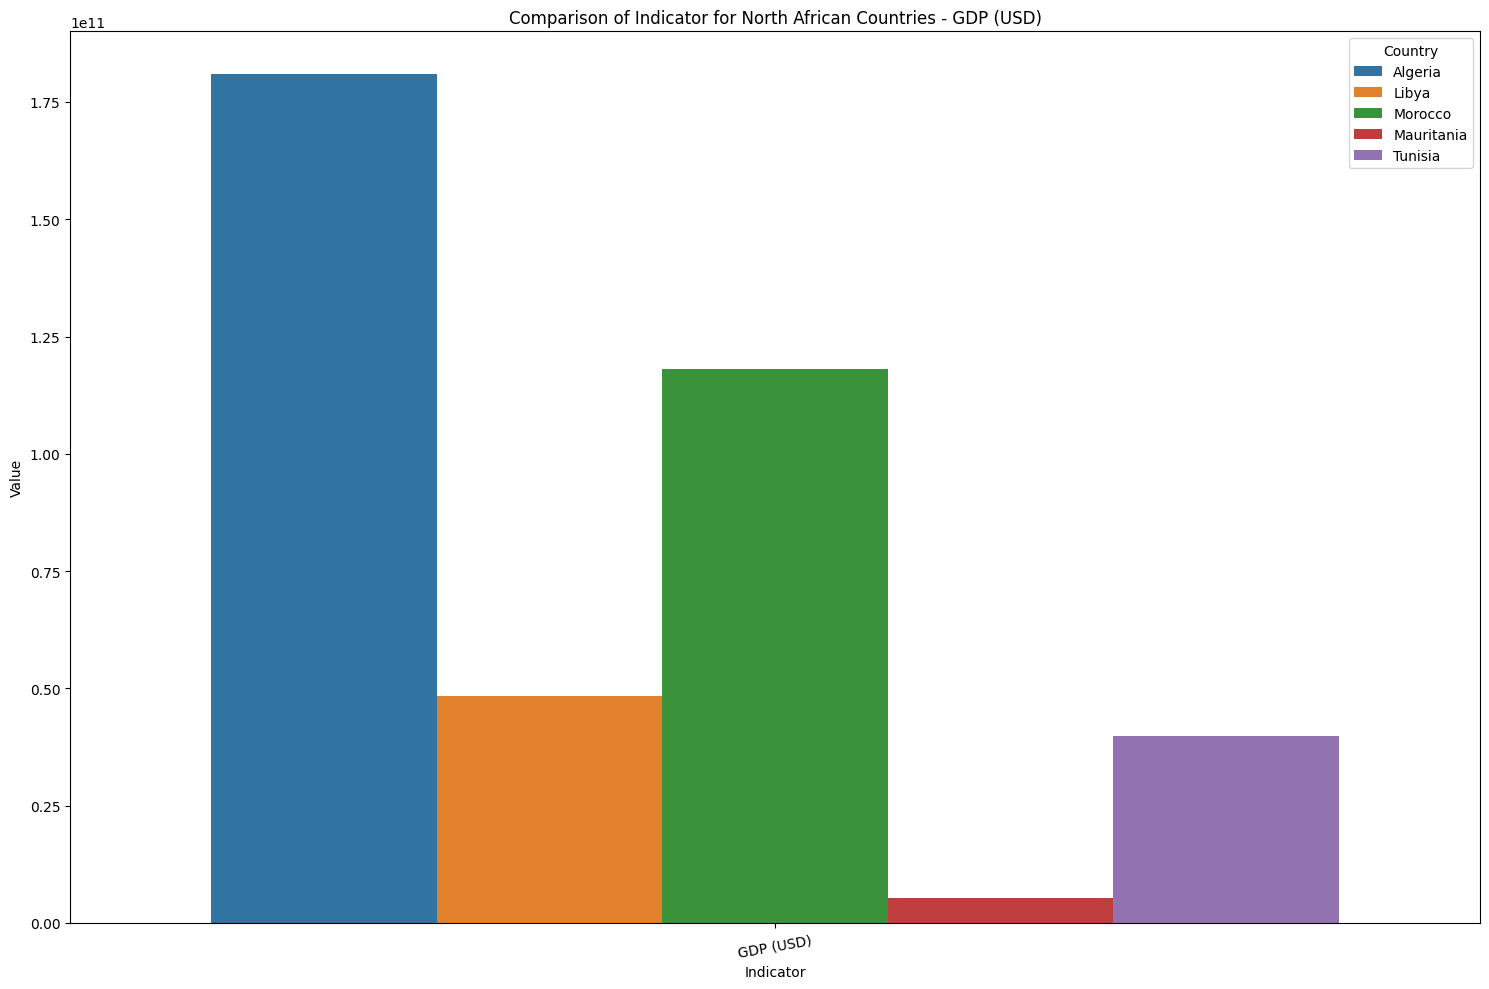

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['GDP (USD)'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - GDP (USD)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

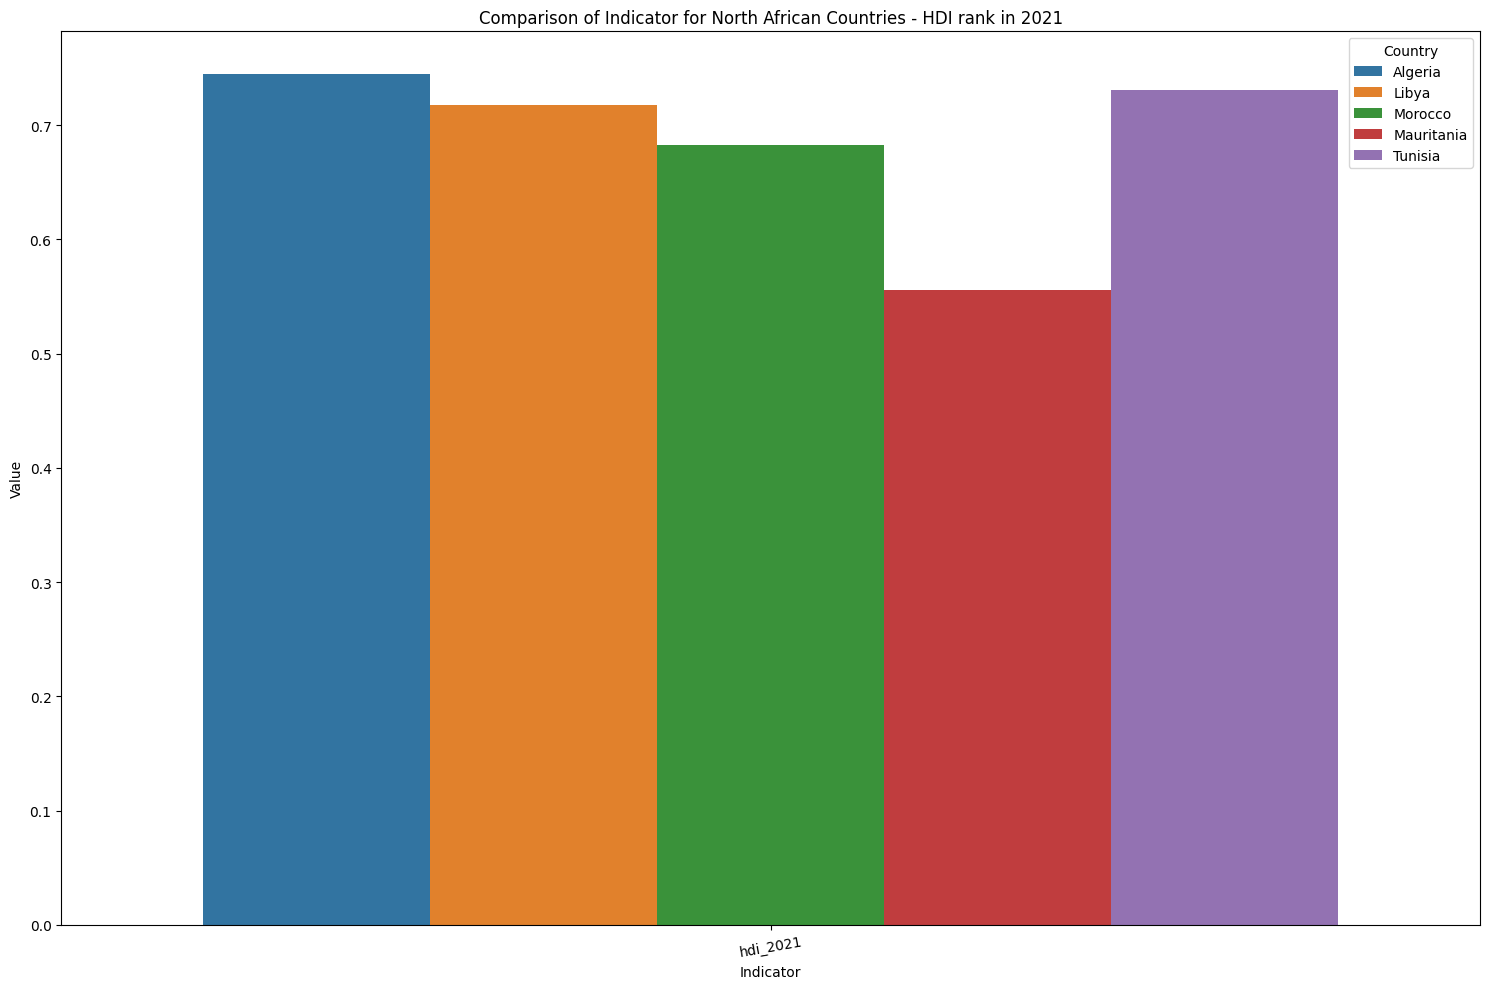

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['hdi_2021'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - HDI rank in 2021')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

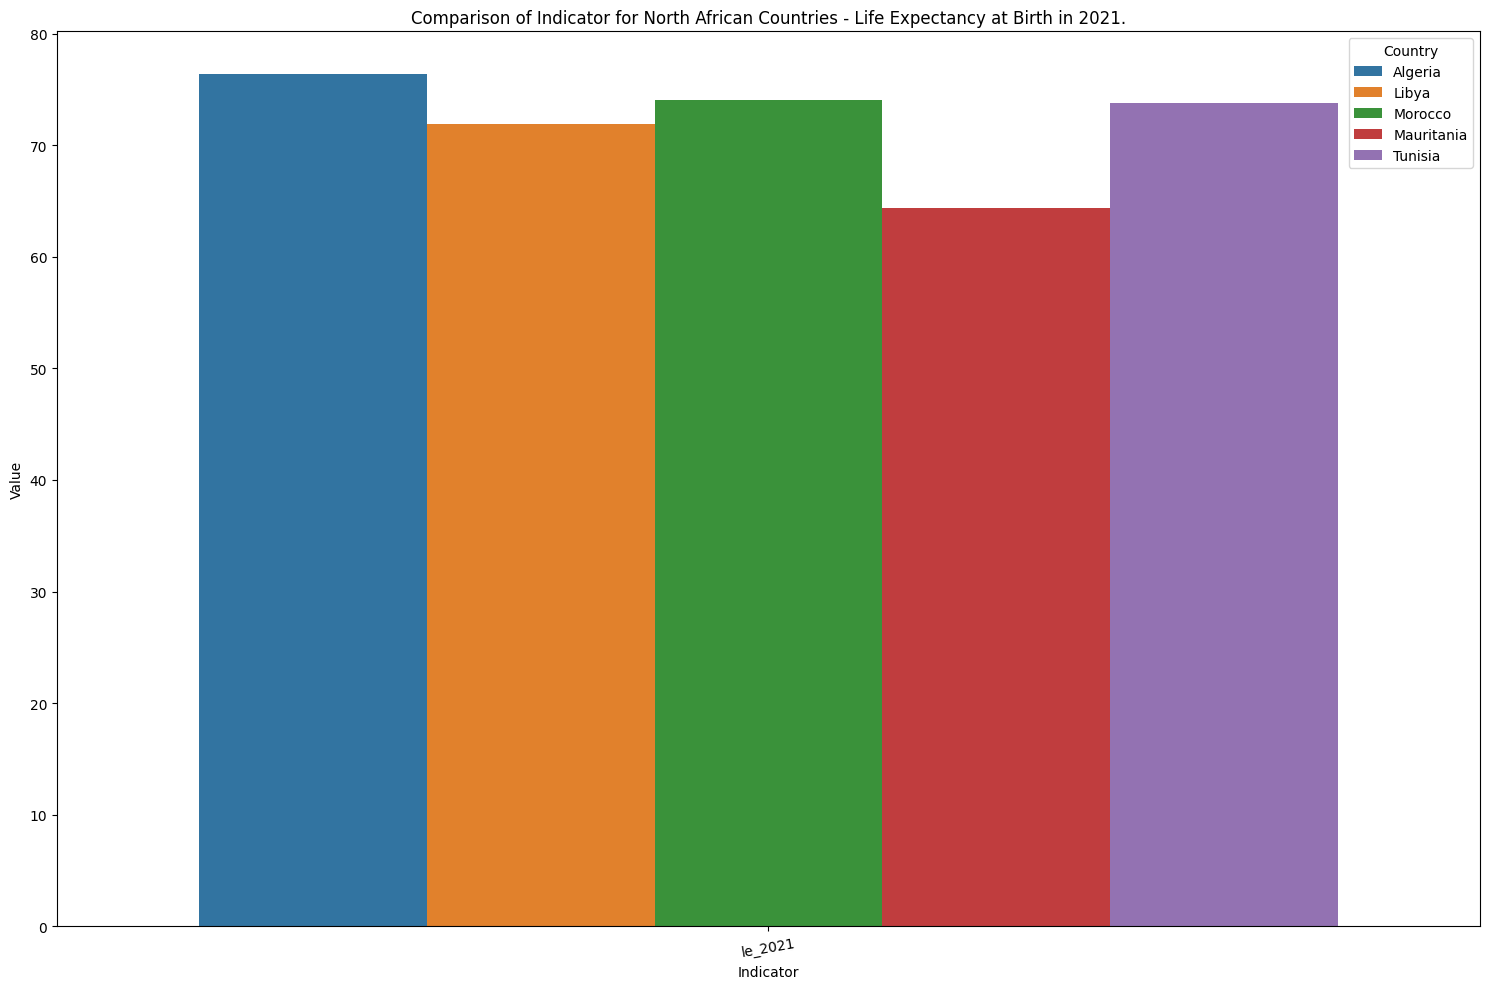

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['le_2021'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - Life Expectancy at Birth in 2021.')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

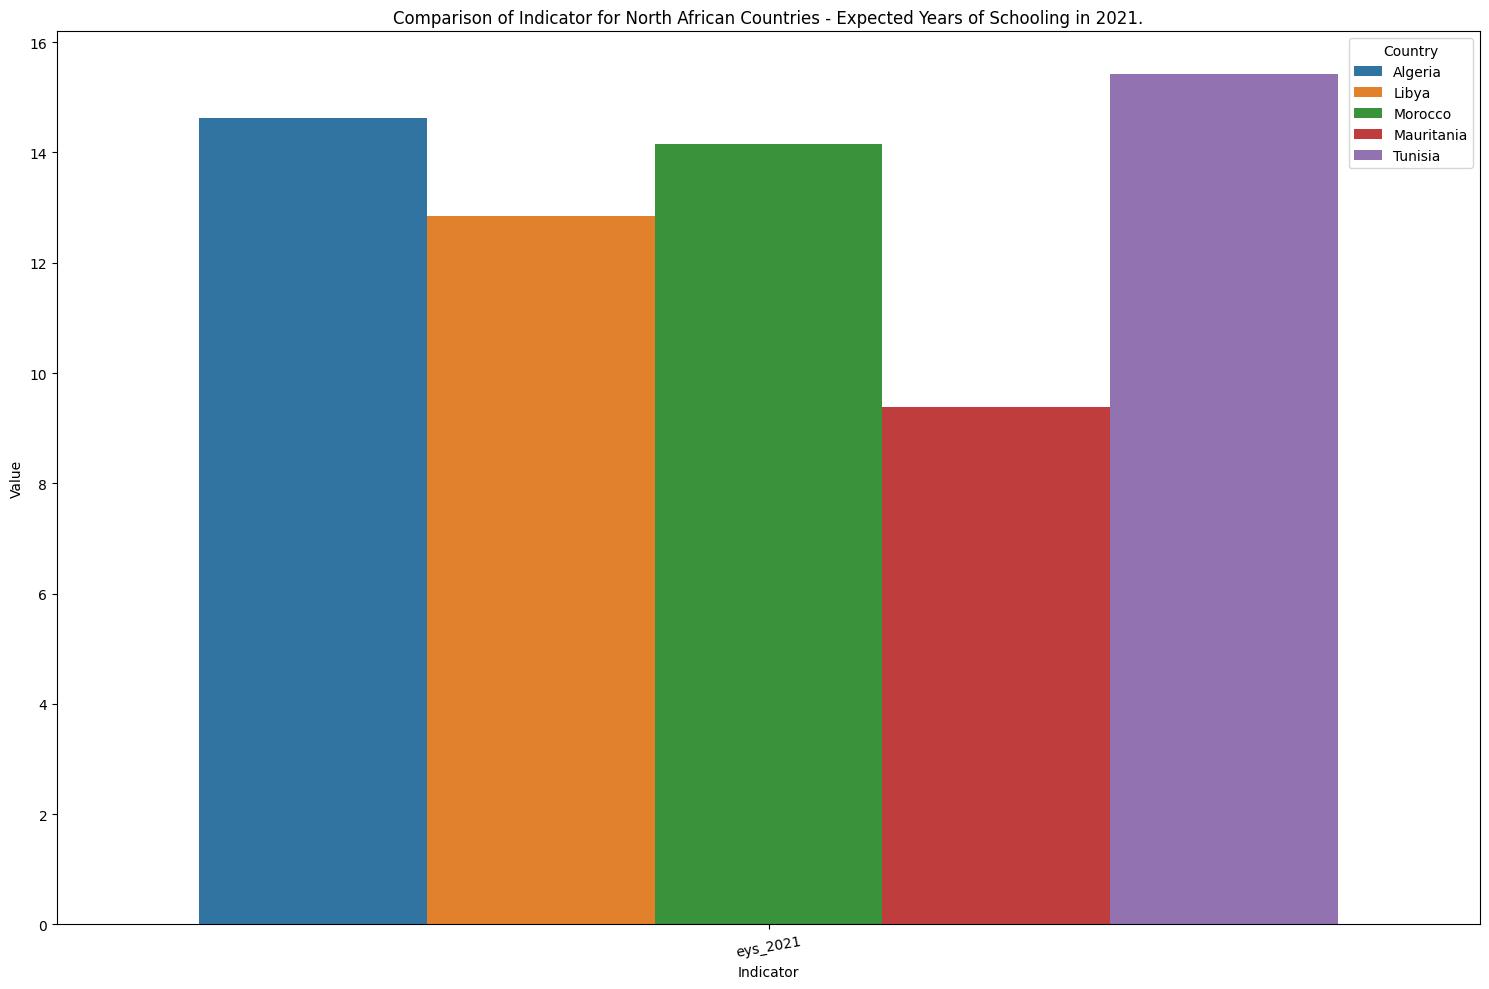

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['eys_2021'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - Expected Years of Schooling in 2021.')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

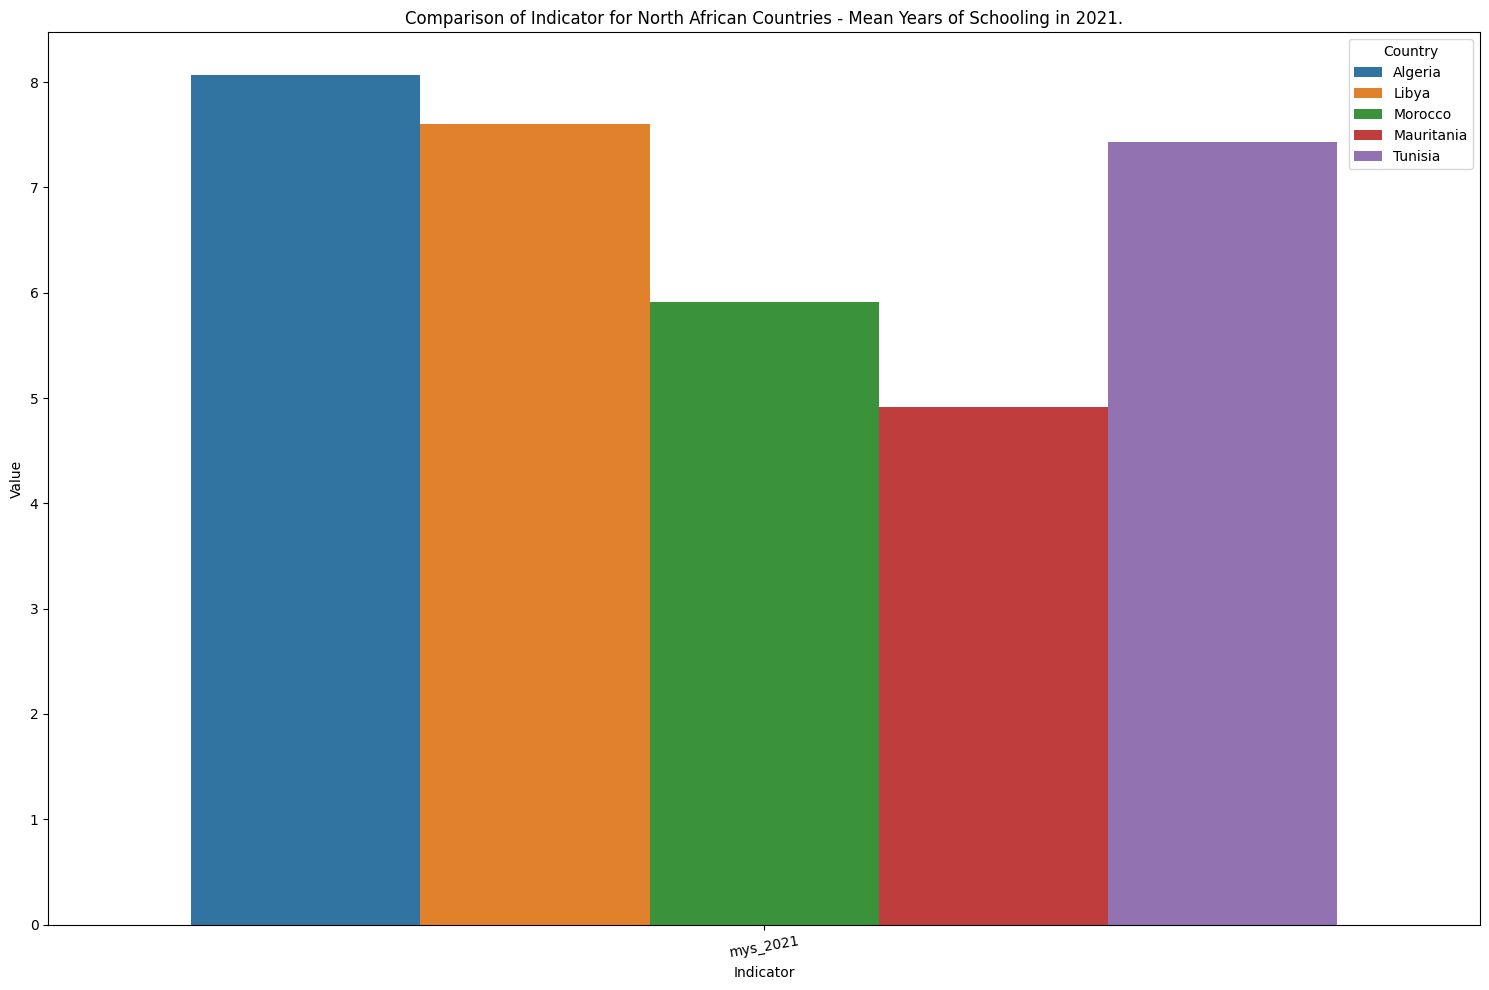

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['mys_2021'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - Mean Years of Schooling in 2021.')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

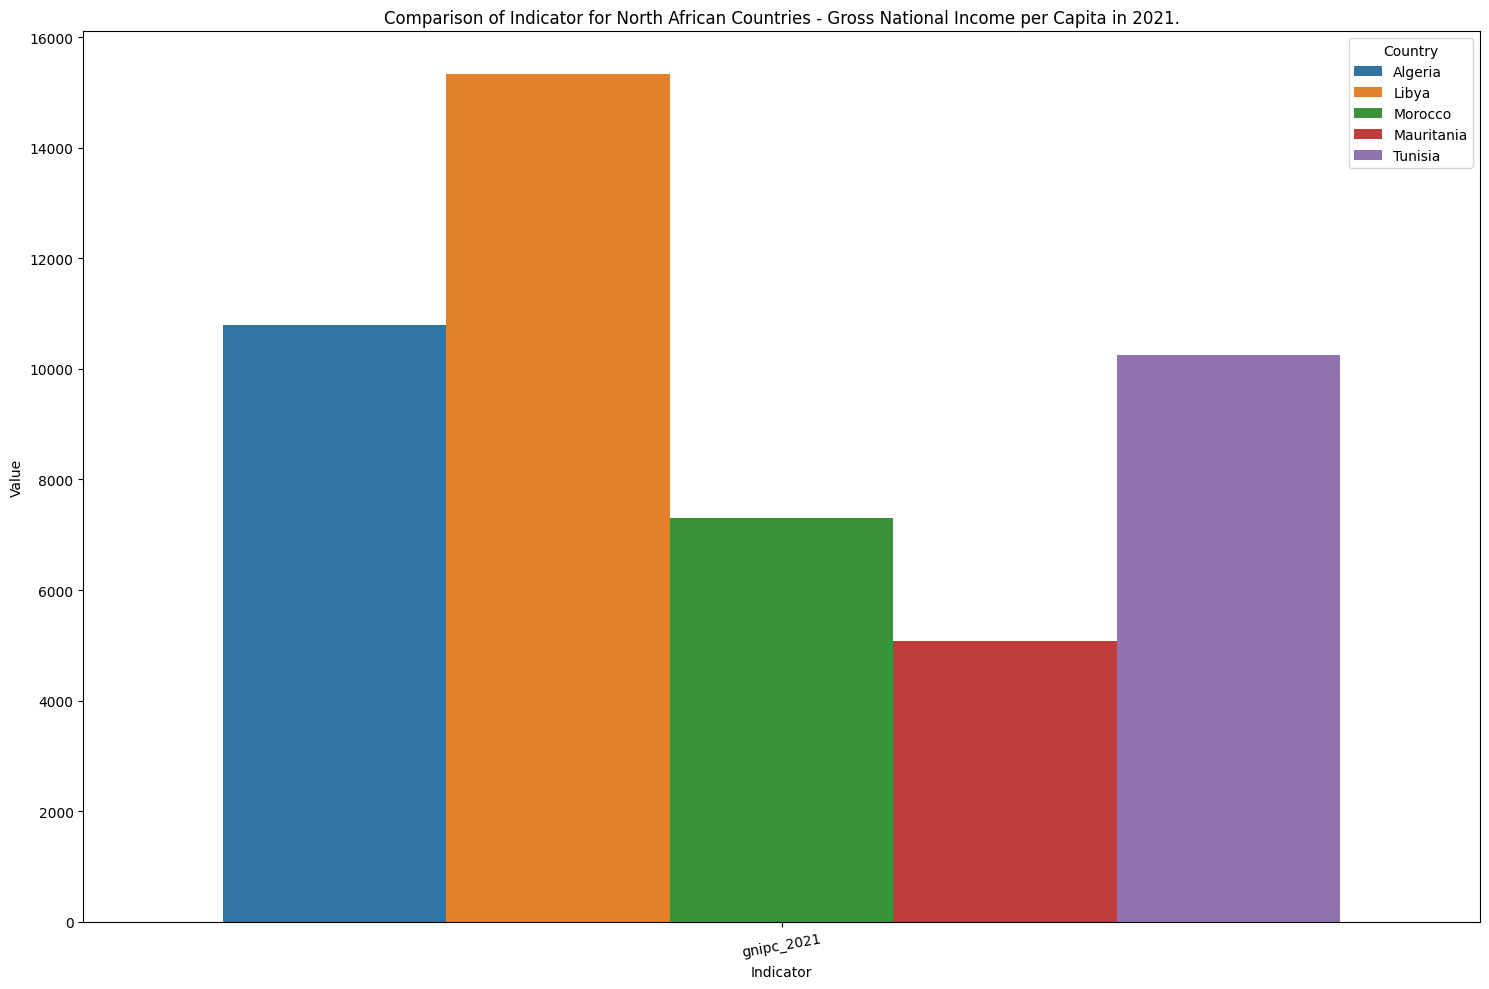

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['gnipc_2021'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - Gross National Income per Capita in 2021.')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

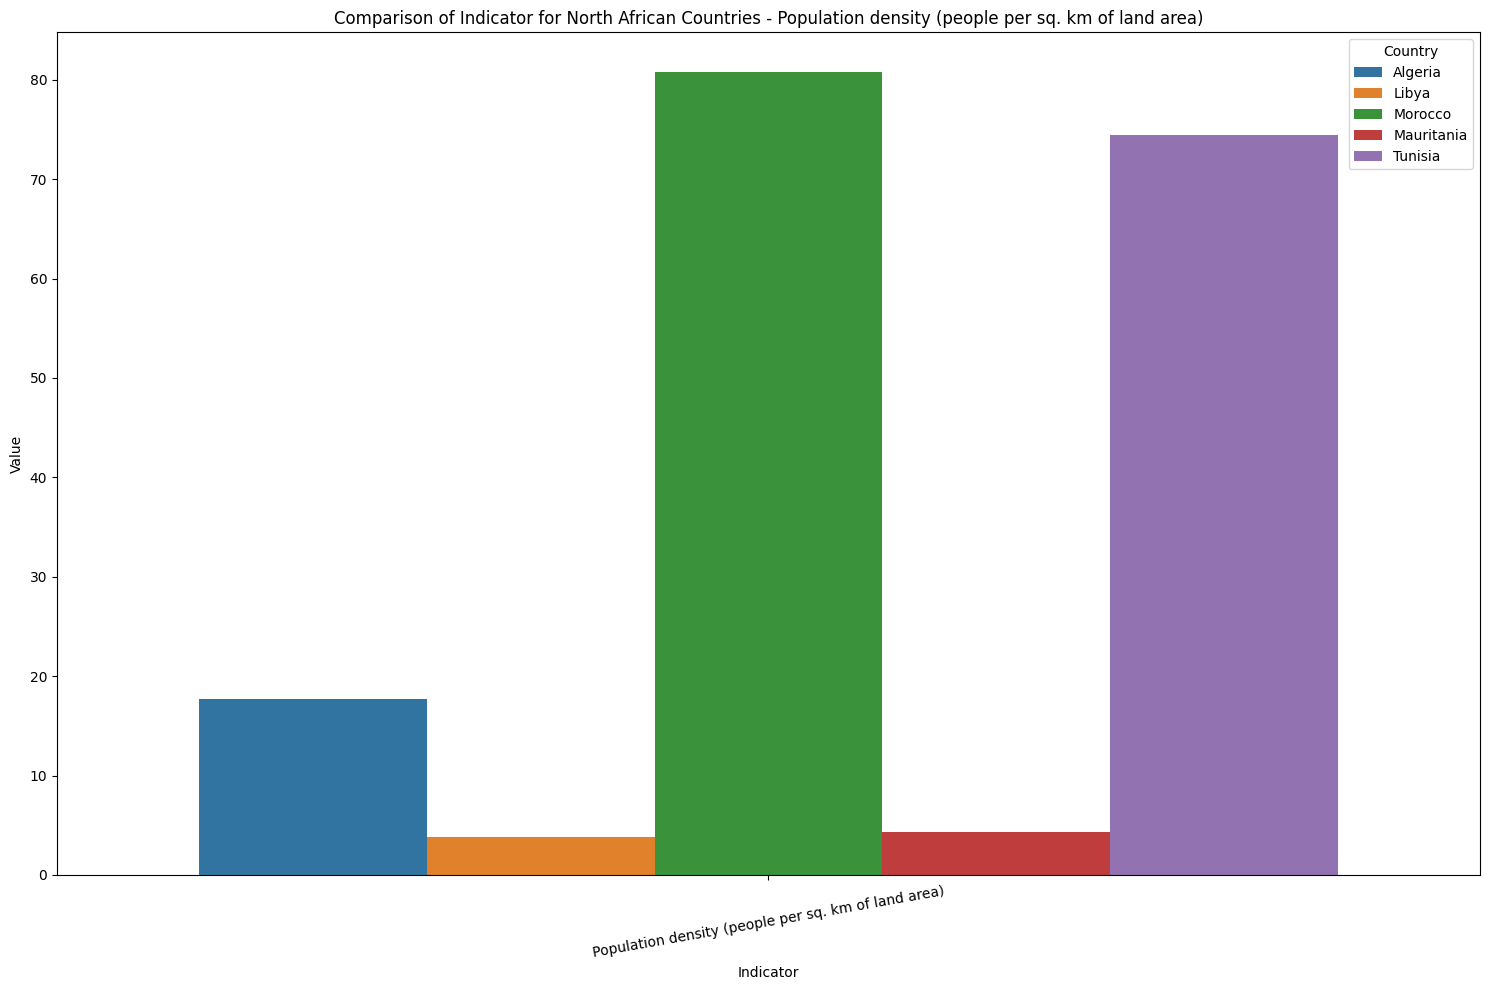

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
melted_comparison = country_comparison.melt(id_vars='country', var_name='Indicator', value_name='Value')

# Filter out non-numeric indicators for plotting
melted_comparison = melted_comparison[melted_comparison['Indicator'].isin(['Population density (people per sq. km of land area)'])]

# Create a bar plot for the comparison of indicators across countries
plt.figure(figsize=(15, 10))
sns.barplot(x='Indicator', y='Value', hue='country', data=melted_comparison)
plt.xticks(rotation=10)
plt.title('Comparison of Indicator for North African Countries - Population density (people per sq. km of land area)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

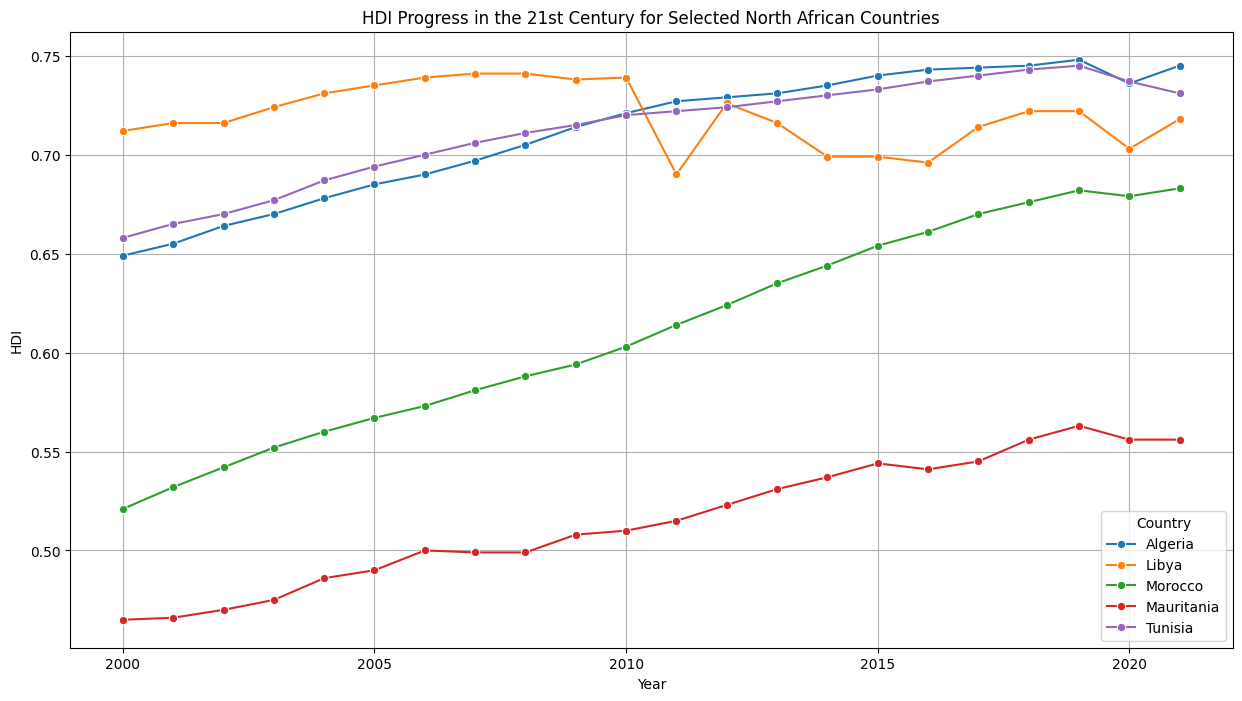

In [15]:
# Extract HDI data from 2000 to 2021 for the countries of interest
hdi_21st_century = hdi_df[hdi_df['country'].isin(countries_of_interest)][['country'] + [f'hdi_{year}' for year in range(2000, 2022)]]

# Melt the data for plotting
hdi_melted = hdi_21st_century.melt(id_vars='country', var_name='Year', value_name='HDI')

# Convert 'Year' to a numeric value for plotting
hdi_melted['Year'] = hdi_melted['Year'].str.extract('(\d+)').astype(int)

# Create a line plot for the HDI over the 21st century
plt.figure(figsize=(15, 8))
sns.lineplot(data=hdi_melted, x='Year', y='HDI', hue='country', marker='o')
plt.title('HDI Progress in the 21st Century for Selected North African Countries')
plt.legend(title='Country')
plt.grid(True)
plt.show()

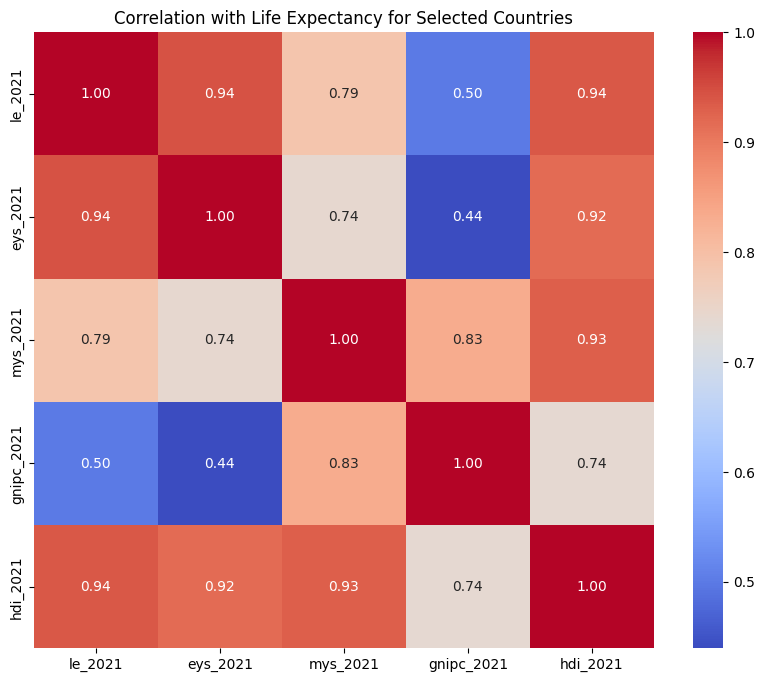

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for life expectancy and other indicators for the year 2021 for the countries of interest
le_indicators_countries = hdi_df[hdi_df['country'].isin(countries_of_interest)][['country', 'le_2021', 'eys_2021', 'mys_2021', 'gnipc_2021', 'hdi_2021']]

# Calculate the correlation matrix for these countries
le_correlation_countries = le_indicators_countries.drop('country', axis=1).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(le_correlation_countries, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation with Life Expectancy for Selected Countries')
plt.show()

**The heatmap of the correlation matrix for selected countries (Morocco, Algeria, Tunisia, Mauritania, and Libya) shows the following insights for the year 2021:**

- Life expectancy (le_2021) is strongly positively correlated with the Human Development Index (hdi_2021), with a correlation coefficient of 0.89. This suggests that higher HDI is associated with longer life expectancy in these countries.

- Expected years of schooling (eys_2021) and mean years of schooling (mys_2021) are also positively correlated with life expectancy, with coefficients of 0.78 and 0.71, respectively. This indicates that better educational outcomes are linked to longer lifespans.

- Gross national income per capita (gnipc_2021) has a strong positive correlation with life expectancy, with a coefficient of 0.85, highlighting the relationship between higher income levels and longer life expectancy.

Overall, the indicators of development, education, and income are all closely associated with life expectancy, underscoring the importance of these factors in influencing health outcomes and longevity in the selected North African countries.

In [21]:
# Calculate the median GNI per capita to split the countries into 'High Income' and 'Low Income'
median_gni = hdi_df[hdi_df['country'].isin(countries_of_interest)]['gnipc_2021'].median()

# Categorize countries based on the median GNI per capita
hdi_df['Income Category'] = hdi_df.apply(lambda row: 'High Income' if row['gnipc_2021'] >= median_gni else 'Low Income', axis=1)

# Filter the HDI data for the countries of interest and the most recent year
hdi_income_comparison = hdi_df[hdi_df['country'].isin(countries_of_interest)][['country', 'Income Category', 'hdi_2021', 'le_2021', 'eys_2021', 'mys_2021', 'gnipc_2021']]

# Group by income category and calculate the mean for each indicator
income_category_means_selected = hdi_income_comparison.groupby('Income Category').mean()

# Calculate the difference between 'High Income' and 'Low Income' groups
income_diff_selected = income_category_means_selected.loc['High Income'] - income_category_means_selected.loc['Low Income']

# Sort the differences to find the most significant factors that differentiate the two groups
sorted_income_diff_selected = income_diff_selected.sort_values(ascending=False)

# Display the most significant factors
sorted_income_diff_selected

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_23907/1668047355.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_category_means_selected = hdi_income_comparison.groupby('Income Category').mean()


gnipc_2021    5942.098303
le_2021          4.817183
eys_2021         2.538151
mys_2021         2.282887
hdi_2021         0.111833
dtype: float64

- The analysis of factors differentiating "High Income" vs "Low Income" countries globally shows that Gross National Income per capita (GNI per capita) is the most significant differentiator, with high-income countries having much higher GNI per capita values. Other key indicators where high-income countries outperform low-income countries include life expectancy, expected years of schooling, mean years of schooling, and overall Human Development Index (HDI) scores.

- When focusing on Morocco, Algeria, Tunisia, Mauritania, and Libya, the same trend is observed: GNI per capita is the most significant factor separating high-income from low-income countries within this group. Additionally, life expectancy and educational attainment (both expected and mean years of schooling) are higher in high-income countries, reflecting better health outcomes and access to education. The HDI scores also follow this pattern, with high-income countries achieving higher HDI values, indicating better overall human development.

[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)
